In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
colors=sns.color_palette('deep')

In [2]:
with open('./logs/dump/res.pkl', 'rb') as handle:
    res = pickle.load(handle)

In [3]:
uav=["uav1","uav2","uav3","default_exp","uav5","uav6"]
mine=["mine1","mine2","mine3","default_exp","mine5","mine6"]
target=["target1","target2","target3","default_exp","target5","target6"]

In [4]:
def boxplot(prop,eval_obj_list,xlabel='Total',ylabel='Prop',figname=None):
    fig, ax = plt.subplots(figsize=(7,5))

    pos=[1,3,5,7,9,11]
    sep=0.7

    bp1=\
    ax.boxplot([res[e+"_dis"][prop] for e in eval_obj_list],
                positions=pos,
                showfliers=True,notch=False,patch_artist=True,
                flierprops=dict(marker='^',markeredgecolor='k'),
                boxprops=dict(linewidth=2.0,color='black',facecolor=colors[0]),
                whiskerprops = dict(linestyle='-',linewidth=2.0, color='black'),
                capprops=dict(linestyle='-',linewidth=2.0, color='black'),
                medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
              )

    bp2=\
    ax.boxplot([res[e+"_cent"][prop] for e in eval_obj_list],
                positions=[e+sep for e in pos],
                showfliers=True,notch=False,patch_artist=True,
                flierprops=dict(marker='x',markeredgecolor='k'),
                boxprops=dict(linewidth=2.0,color='black',facecolor=colors[1]),
                whiskerprops = dict(linestyle='-',linewidth=2.0, color='black'),
                capprops=dict(linestyle='-',linewidth=2.0, color='black'),
                medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
              )

    ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['D-GLIDE', 'C-GLIDE'],
              prop={'size':22},loc='best')

    ax.set_xlabel(xlabel,fontsize=22)
    ax.set_ylabel(ylabel,fontsize=22)
    ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
    ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
    plt.yticks(fontsize=18)
    #ax.set_ylim(-0.5,6.5)
    plt.tight_layout()
    plt.grid()
    fig.savefig(figname)

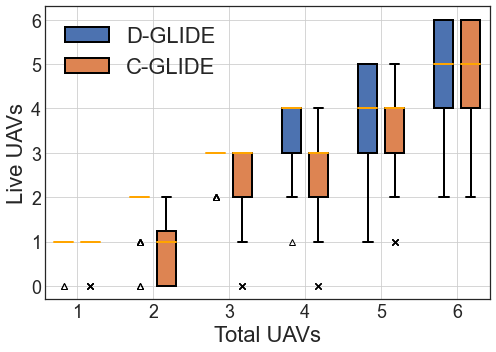

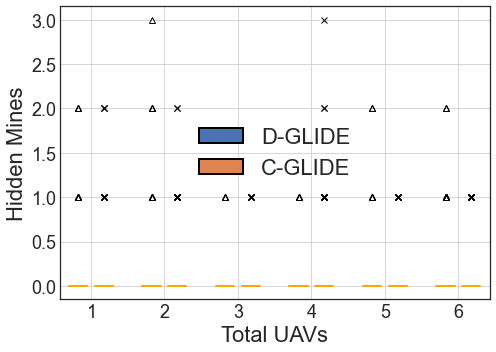

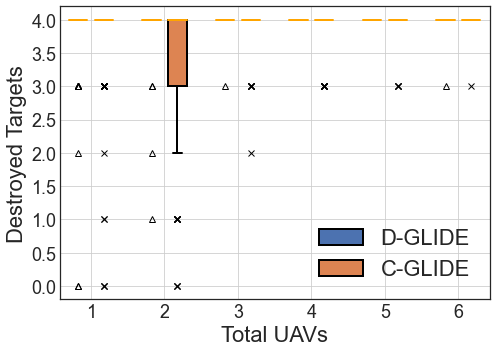

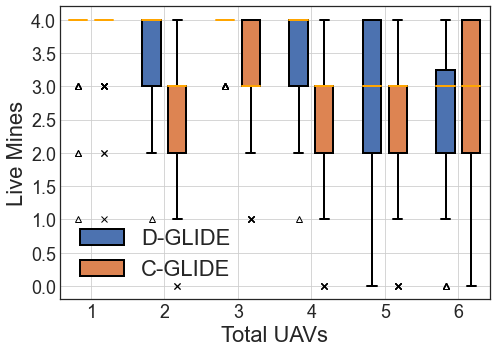

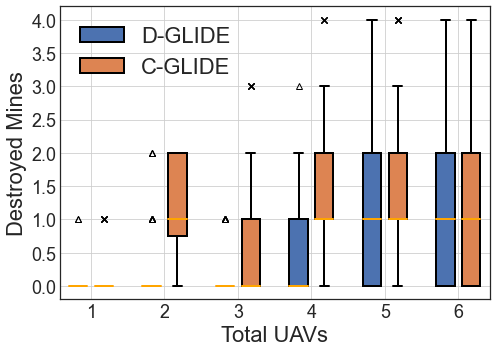

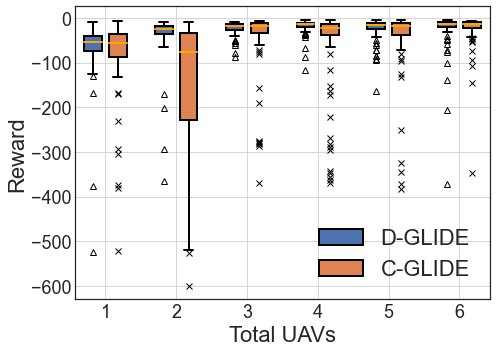

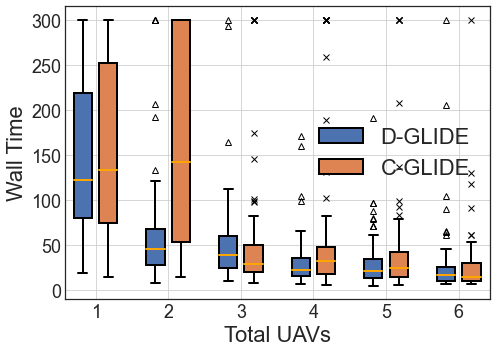

In [5]:
#UAV
uav_exps=\
[
    ('num_live_uav','Total UAVs','Live UAVs','./logs/uav/uav_num_live_uav.pdf'),
    ('num_hidden_mines','Total UAVs','Hidden Mines','./logs/uav/uav_num_hidden_mines.pdf'),
    ('num_destroyed_targets','Total UAVs','Destroyed Targets','./logs/uav/uav_num_destroyed_targets.pdf'),
    ('num_live_mines','Total UAVs','Live Mines','./logs/uav/uav_num_live_mines.pdf'),
    ('num_destroyed_mines','Total UAVs','Destroyed Mines','./logs/uav/uav_num_destroyed_mines.pdf'),
    ('reward','Total UAVs','Reward','./logs/uav/uav_reward.pdf'),
    ('sim_time','Total UAVs','Wall Time','./logs/uav/uav_sim_time.pdf')
]

for prop,xlbl,ylbl,fname in uav_exps:
    boxplot(prop,uav,xlabel=xlbl,ylabel=ylbl,figname=fname)

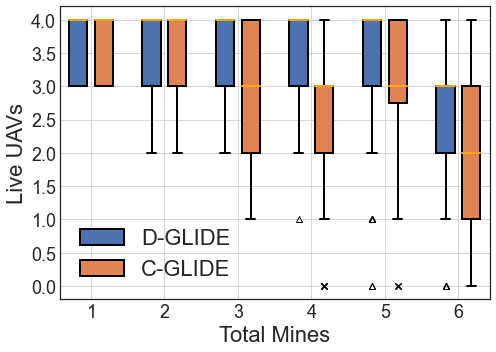

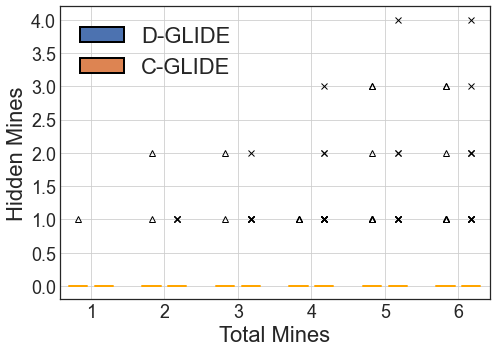

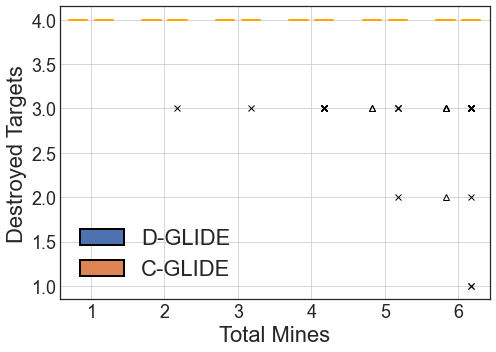

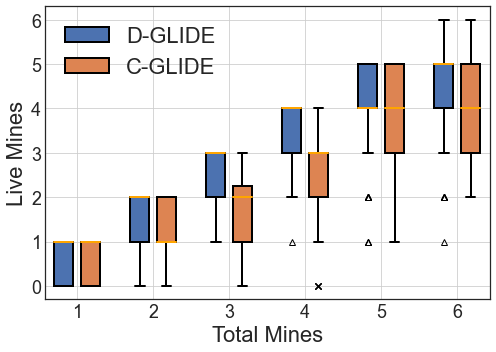

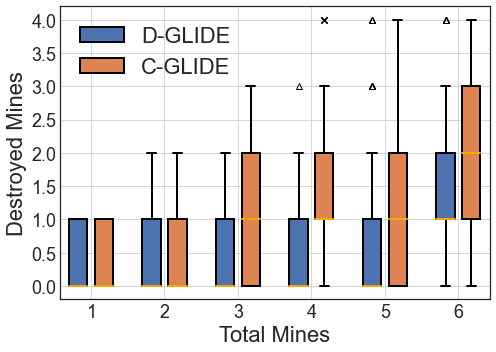

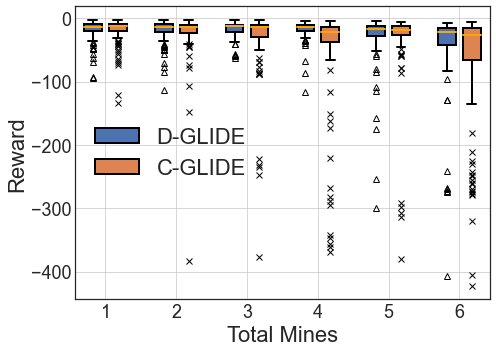

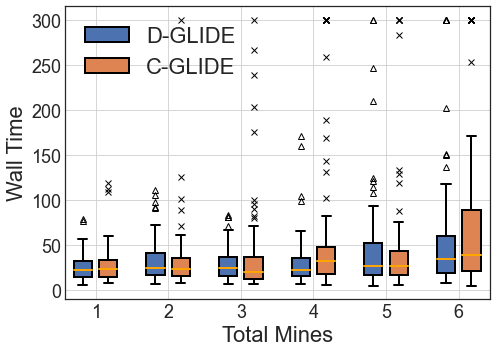

In [6]:
#Mine
mine_exps=\
[
    ('num_live_uav','Total Mines','Live UAVs','./logs/mine/mine_num_live_uav.pdf'),
    ('num_hidden_mines','Total Mines','Hidden Mines','./logs/mine/mine_num_hidden_mines.pdf'),
    ('num_destroyed_targets','Total Mines','Destroyed Targets','./logs/mine/mine_num_destroyed_targets.pdf'),
    ('num_live_mines','Total Mines','Live Mines','./logs/mine/mine_num_live_mines.pdf'),
    ('num_destroyed_mines','Total Mines','Destroyed Mines','./logs/mine/mine_num_destroyed_mines.pdf'),
    ('reward','Total Mines','Reward','./logs/mine/mine_reward.pdf'),
    ('sim_time','Total Mines','Wall Time','./logs/mine/mine_sim_time.pdf')
]

for prop,xlbl,ylbl,fname in mine_exps:
    boxplot(prop,mine,xlabel=xlbl,ylabel=ylbl,figname=fname)

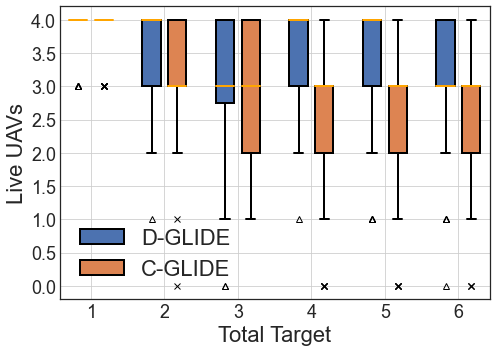

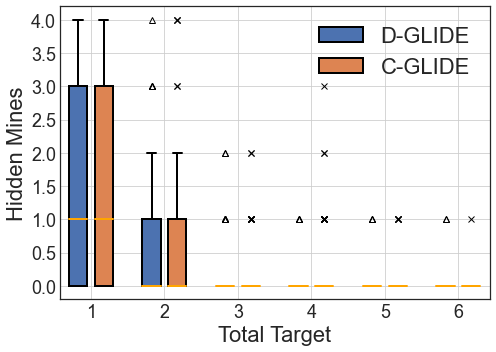

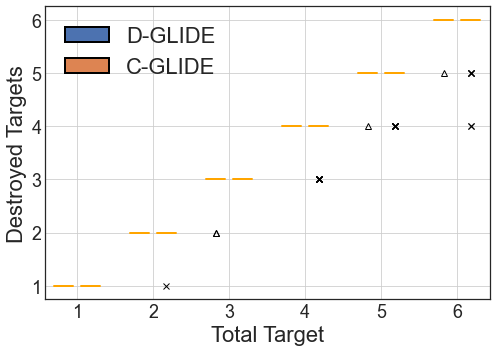

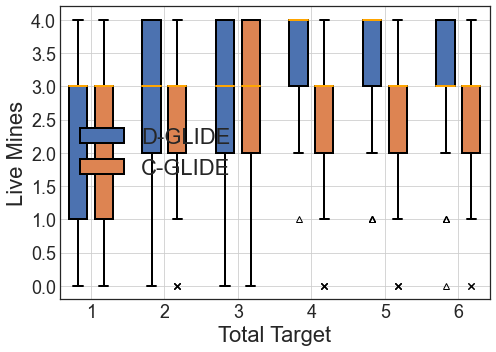

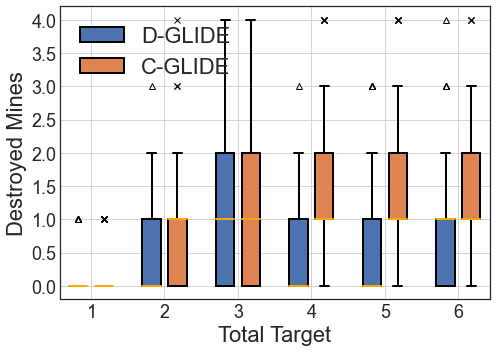

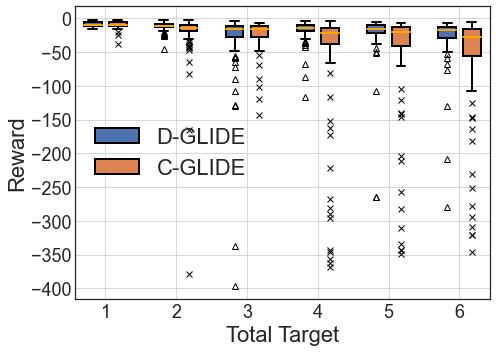

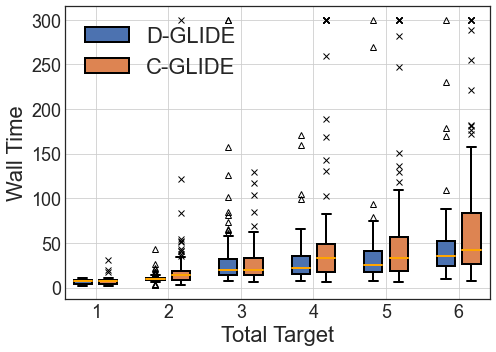

In [7]:
#Mine
target_exps=\
[
    ('num_live_uav','Total Target','Live UAVs','./logs/target/target_num_live_uav.pdf'),
    ('num_hidden_mines','Total Target','Hidden Mines','./logs/target/target_num_hidden_mines.pdf'),
    ('num_destroyed_targets','Total Target','Destroyed Targets','./logs/target/target_num_destroyed_targets.pdf'),
    ('num_live_mines','Total Target','Live Mines','./logs/target/target_num_live_mines.pdf'),
    ('num_destroyed_mines','Total Target','Destroyed Mines','./logs/target/target_num_destroyed_mines.pdf'),
    ('reward','Total Target','Reward','./logs/target/target_reward.pdf'),
    ('sim_time','Total Target','Wall Time','./logs/target/target_sim_time.pdf')
]

for prop,xlbl,ylbl,fname in target_exps:
    boxplot(prop,target,xlabel=xlbl,ylabel=ylbl,figname=fname)

In [8]:
#Individual plots

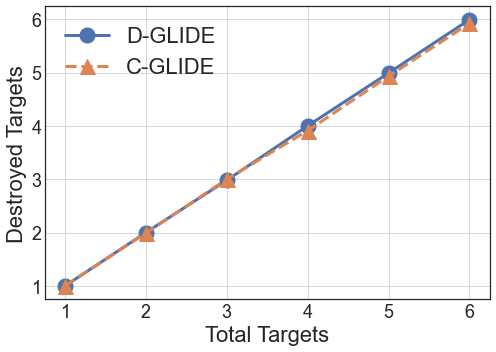

In [8]:
fig, ax = plt.subplots(figsize=(7,5))

pos=[1,2,3,4,5,6]

ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_destroyed_targets']) for exp in target],
         linestyle='solid',
         marker='o', linewidth=3,
         markersize=15,label='D-GLIDE',color=colors[0])

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_destroyed_targets']) for exp in target],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='C-GLIDE',color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Targets',fontsize=22)
ax.set_ylabel('Destroyed Targets',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.grid()
fig.savefig("./logs/target/tar_vs_dtar.pdf")

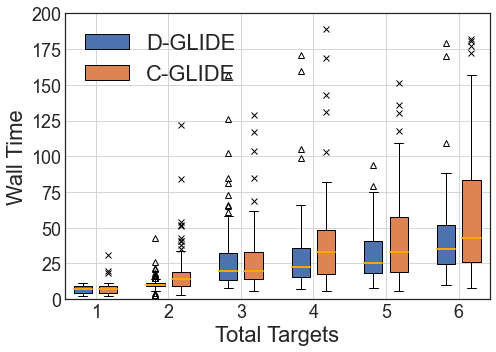

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
prop='sim_time'
pos=[1,3,5,7,9,11]
sep=0.7

bp1=\
ax.boxplot([res[e+"_dis"][prop] for e in target],
            positions=pos,
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='^',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[0]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

bp2=\
ax.boxplot([res[e+"_cent"][prop] for e in target],
            positions=[e+sep for e in pos],
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='x',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[1]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['D-GLIDE', 'C-GLIDE'],
          prop={'size':22},loc='best')

ax.set_xlabel('Total Targets',fontsize=22)
ax.set_ylabel('Wall Time',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,200)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/target/tar_vs_wt.pdf")

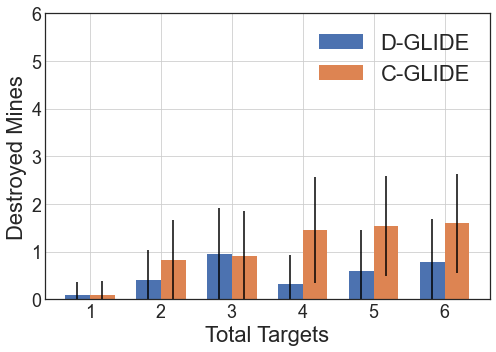

In [10]:
fig, ax = plt.subplots(figsize=(7,5))
prop='num_destroyed_mines'
pos=np.array([1,3,5,7,9,11])
sep=0.7

bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in target],
       yerr=[np.std(res[e+"_dis"][prop]) for e in target],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in target],
       yerr=[np.std(res[e+"_cent"][prop]) for e in target],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Targets',fontsize=22)
ax.set_ylabel('Destroyed Mines',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,6)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/target/tar_vs_dmine.pdf")

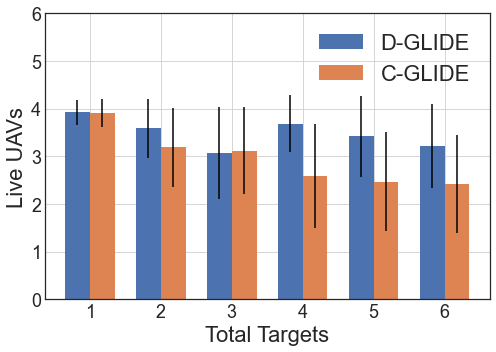

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
prop='num_live_uav'
pos=np.array([1,3,5,7,9,11])
sep=0.7

bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in target],
       yerr=[np.std(res[e+"_dis"][prop]) for e in target],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in target],
       yerr=[np.std(res[e+"_cent"][prop]) for e in target],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Targets',fontsize=22)
ax.set_ylabel('Live UAVs',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,6)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/target/tar_vs_luav.pdf")

In [12]:
#Mines

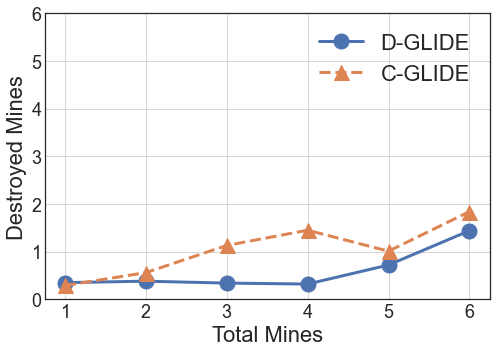

In [13]:
fig, ax = plt.subplots(figsize=(7,5))

pos=[1,2,3,4,5,6]

ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_destroyed_mines']) for exp in mine],
         linestyle='solid',
         marker='o', linewidth=3,
         markersize=15,label='D-GLIDE',color=colors[0])

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_destroyed_mines']) for exp in mine],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='C-GLIDE',color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Mines',fontsize=22)
ax.set_ylabel('Destroyed Mines',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0,6)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/mine/mine_vs_dmine.pdf")

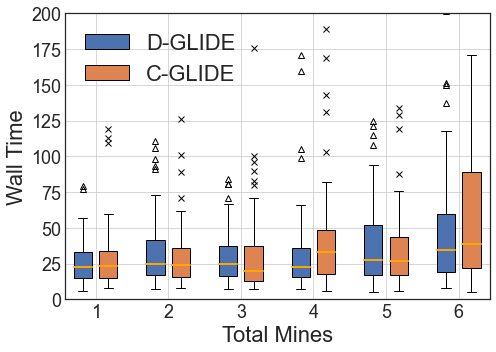

In [14]:
fig, ax = plt.subplots(figsize=(7,5))
prop='sim_time'
pos=[1,3,5,7,9,11]
sep=0.7

bp1=\
ax.boxplot([res[e+"_dis"][prop] for e in mine],
            positions=pos,
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='^',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[0]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

bp2=\
ax.boxplot([res[e+"_cent"][prop] for e in mine],
            positions=[e+sep for e in pos],
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='x',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[1]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['D-GLIDE', 'C-GLIDE'],
          prop={'size':22},loc='best')

ax.set_xlabel('Total Mines',fontsize=22)
ax.set_ylabel('Wall Time',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,200)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/mine/mine_vs_wt.pdf")

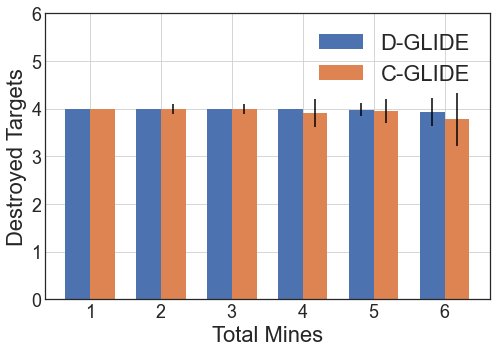

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
prop='num_destroyed_targets'
pos=np.array([1,3,5,7,9,11])
sep=0.7

bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in mine],
       yerr=[np.std(res[e+"_dis"][prop]) for e in mine],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in mine],
       yerr=[np.std(res[e+"_cent"][prop]) for e in mine],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Mines',fontsize=22)
ax.set_ylabel('Destroyed Targets',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,6)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/mine/mine_vs_dtar.pdf")

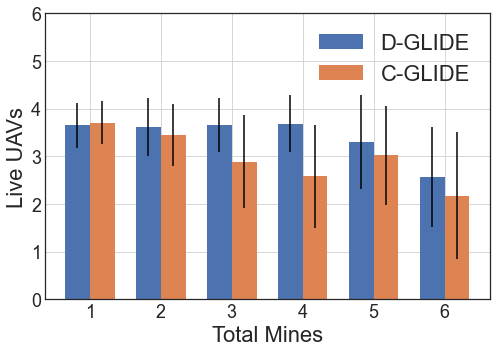

In [16]:
fig, ax = plt.subplots(figsize=(7,5))
prop='num_live_uav'
pos=np.array([1,3,5,7,9,11])
sep=0.7

bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in mine],
       yerr=[np.std(res[e+"_dis"][prop]) for e in mine],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in mine],
       yerr=[np.std(res[e+"_cent"][prop]) for e in mine],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total Mines',fontsize=22)
ax.set_ylabel('Live UAVs',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,6)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/mine/mine_vs_luav.pdf")

In [17]:
#UAV

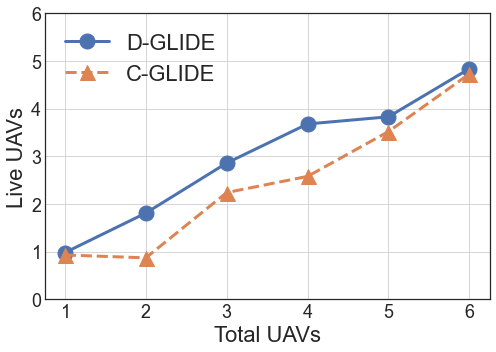

In [18]:
fig, ax = plt.subplots(figsize=(7,5))

pos=[1,2,3,4,5,6]

ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_live_uav']) for exp in uav],
         linestyle='solid',
         marker='o', linewidth=3,
         markersize=15,label='D-GLIDE',color=colors[0])

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_live_uav']) for exp in uav],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='C-GLIDE',color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total UAVs',fontsize=22)
ax.set_ylabel('Live UAVs',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0,6)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/uav/uav_vs_luav.pdf")

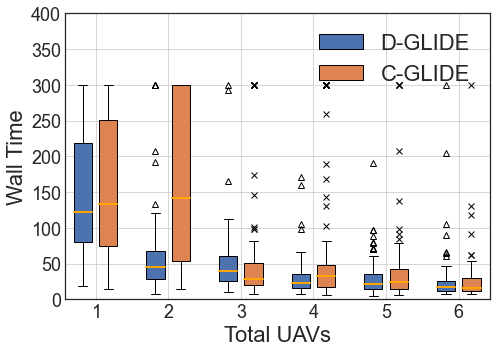

In [25]:
fig, ax = plt.subplots(figsize=(7,5))
prop='sim_time'
pos=[1,3,5,7,9,11]
sep=0.7

bp1=\
ax.boxplot([res[e+"_dis"][prop] for e in uav],
            positions=pos,
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='^',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[0]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

bp2=\
ax.boxplot([res[e+"_cent"][prop] for e in uav],
            positions=[e+sep for e in pos],
            showfliers=True,notch=False,patch_artist=True,
            flierprops=dict(marker='x',markeredgecolor='k'),
            boxprops=dict(linewidth=1.0,color='black',facecolor=colors[1]),
            whiskerprops = dict(linestyle='-',linewidth=1.0, color='black'),
            capprops=dict(linestyle='-',linewidth=1.0, color='black'),
            medianprops=dict(linestyle='-',linewidth=2.0, color='orange')
          )

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['D-GLIDE', 'C-GLIDE'],
          prop={'size':22},loc='upper right')

ax.set_xlabel('Total UAVs',fontsize=22)
ax.set_ylabel('Wall Time',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,400)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/uav/uav_vs_wt.pdf")

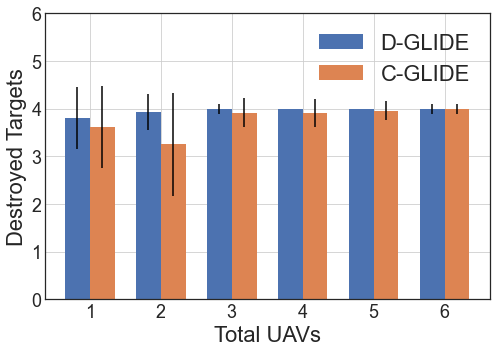

In [21]:
fig, ax = plt.subplots(figsize=(7,5))
prop='num_destroyed_targets'
pos=np.array([1,3,5,7,9,11])
sep=0.7

bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in uav],
       yerr=[np.std(res[e+"_dis"][prop]) for e in uav],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in uav],
       yerr=[np.std(res[e+"_cent"][prop]) for e in uav],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total UAVs',fontsize=22)
ax.set_ylabel('Destroyed Targets',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,6)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/uav/uav_vs_dtar.pdf")

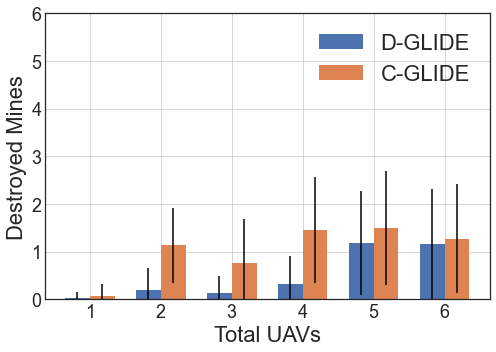

In [22]:
fig, ax = plt.subplots(figsize=(7,5))
prop='num_destroyed_mines'
pos=np.array([1,3,5,7,9,11])
sep=0.7

bp1=\
ax.bar(height=[np.mean(res[e+"_dis"][prop]) for e in uav],
       yerr=[np.std(res[e+"_dis"][prop]) for e in uav],
       x=pos,label='D-GLIDE',width=0.7,color=colors[0])

bp2=\
ax.bar(height=[np.mean(res[e+"_cent"][prop]) for e in uav],
       yerr=[np.std(res[e+"_cent"][prop]) for e in uav],
       x=pos+sep,label='C-GLIDE',width=0.7,color=colors[1])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Total UAVs',fontsize=22)
ax.set_ylabel('Destroyed Mines',fontsize=22)
ax.set_xticks([1.35,3.35,5.35,7.35,9.35,11.35])
ax.set_xticklabels(['1','2','3','4','5','6'],fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylim(0,6)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/uav/uav_vs_dmine.pdf")

In [18]:
#Exploration

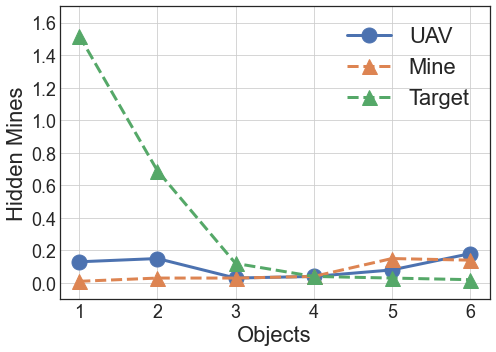

In [23]:
fig, ax = plt.subplots(figsize=(7,5))

pos=[1,2,3,4,5,6]

ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in uav],
         linestyle='solid',
         marker='o', linewidth=3,
         markersize=15,label='UAV',color=colors[0])
# ax.fill_between(
#     pos,
#     np.clip(np.array([np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in uav])-\
#     np.array([np.std(res[exp+'_dis']['num_hidden_mines']) for exp in uav]),0,np.inf),
#     np.array([np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in uav])+\
#     np.array([np.std(res[exp+'_dis']['num_hidden_mines']) for exp in uav]),
#     interpolate=True,
#     alpha=0.3,color=colors[0])

ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in mine],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='Mine',color=colors[1])
# ax.fill_between(
#     pos,
#     np.clip(np.array([np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in mine])-\
#     np.array([np.std(res[exp+'_dis']['num_hidden_mines']) for exp in mine]),0,np.inf),
#     np.array([np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in mine])+\
#     np.array([np.std(res[exp+'_dis']['num_hidden_mines']) for exp in mine]),
#     interpolate=True,
#     alpha=0.3,color=colors[1])

ax.plot(pos,
         [np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in target],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='Target',color=colors[2])
# ax.fill_between(
#     pos,
#     np.clip(np.array([np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in target])-\
#     np.array([np.std(res[exp+'_dis']['num_hidden_mines']) for exp in target]),0,np.inf),
#     np.array([np.mean(res[exp+'_dis']['num_hidden_mines']) for exp in target])+\
#     np.array([np.std(res[exp+'_dis']['num_hidden_mines']) for exp in target]),
#     interpolate=True,
#     alpha=0.3,color=colors[2])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Objects',fontsize=22)
ax.set_ylabel('Hidden Mines',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(-0.1,1.7)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/explore/hidden_mine_dis.pdf")

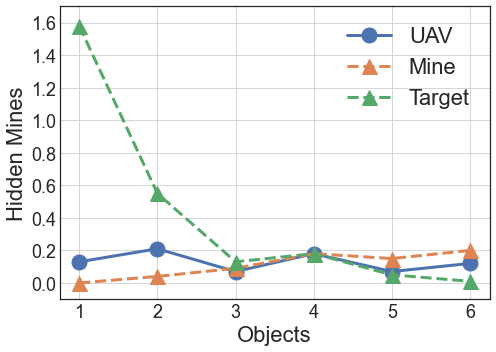

In [24]:
fig, ax = plt.subplots(figsize=(7,5))

pos=[1,2,3,4,5,6]

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in uav],
         linestyle='solid',
         marker='o', linewidth=3,
         markersize=15,label='UAV',color=colors[0])
# ax.fill_between(
#     pos,
#     np.clip(np.array([np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in uav])-\
#     np.array([np.std(res[exp+'_cent']['num_hidden_mines']) for exp in uav]),0,np.inf),
#     np.array([np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in uav])+\
#     np.array([np.std(res[exp+'_cent']['num_hidden_mines']) for exp in uav]),
#     interpolate=True,
#     alpha=0.3,color=colors[0])

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in mine],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='Mine',color=colors[1])
# ax.fill_between(
#     pos,
#     np.clip(np.array([np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in mine])-\
#     np.array([np.std(res[exp+'_cent']['num_hidden_mines']) for exp in mine]),0,np.inf),
#     np.array([np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in mine])+\
#     np.array([np.std(res[exp+'_cent']['num_hidden_mines']) for exp in mine]),
#     interpolate=True,
#     alpha=0.3,color=colors[1])

ax.plot(pos,
         [np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in target],
         linestyle='dashed',
         marker='^',linewidth=3,
         markersize=15,label='Target',color=colors[2])
# ax.fill_between(
#     pos,
#     np.clip(np.array([np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in target])-\
#     np.array([np.std(res[exp+'_cent']['num_hidden_mines']) for exp in target]),0,np.inf),
#     np.array([np.mean(res[exp+'_cent']['num_hidden_mines']) for exp in target])+\
#     np.array([np.std(res[exp+'_cent']['num_hidden_mines']) for exp in target]),
#     interpolate=True,
#     alpha=0.3,color=colors[2])

ax.legend(prop={'size':22},loc='best')

ax.set_xlabel('Objects',fontsize=22)
ax.set_ylabel('Hidden Mines',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(-0.1,1.7)
plt.tight_layout()
plt.grid()
fig.savefig("./logs/explore/hidden_mine_cent.pdf")